## Build your first Machine Learning pipeline using scikit-learn!

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>

<div style="text-align: right\"> Initial upload: 2020.5.14 </div>
<div style="text-align: right\"> Last update: 2020.5. 14</div>

출처  
- https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/  
- https://www.kaggle.com/devashish0507/big-mart-sales-prediction  
- https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

In [3]:
train = pd.read_csv('data/Train.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

- 타겟은 `Item_Outlet_Sales`이다.

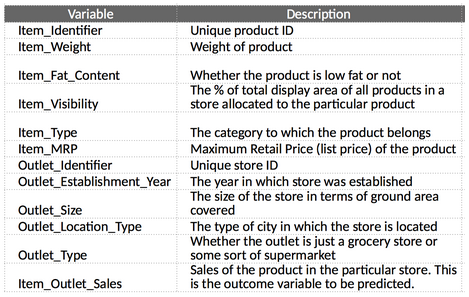

As a part of this problem, we are provided with the information about the stores (location, size, etc), products (weight, category, price, etc) and historical sales data. Using this information, we have to forecast the sales of the products in the stores.

### Building a prototype model

첫번째 단계는 파이프라인의 구조를 정의하는 것이다. 다시말해 머신러닝 파이프라인의 정확한 단계를 리스트업해야 한다.

### Data exploration and preprocessing

첫단계롤 대부분 데이터 exploration을 할 것이다. 개별 변수를 살펴보고 데이터를 전처리 할 것이다.

먼저 데이터에 null 값이 있는지 살펴보자.

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

결측치를 평균 값, 최빈 값(mode)으로 대체한다.

In [8]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [13]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

카테고리 변수 인코딩

In [14]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [16]:
train.select_dtypes(include = ['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

- 여기서는 Item_Identifier를 제외한 나머지를 카테고리 변수로 간주하고 인코딩을 실시한다.  
- 다음 링크를 참고하면 더 개선된 결과를 얻을 수 있지만 일단 여기서는 생략한다.  
https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/

In [18]:
!pip install category_encoders

In [19]:
import category_encoders as ce

In [21]:
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                             'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
                       use_cat_names=True)
# encode the categorical variables
train = OHE.fit_transform(train)

In [22]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.30,1,0,0,0,0,0.016047,1,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,DRC01,5.92,0,1,0,0,0,0.019278,0,1,...,0,0,0,1,0,0,1,0,0,443.4228
2,FDN15,17.50,1,0,0,0,0,0.016760,0,0,...,0,0,1,0,0,1,0,0,0,2097.2700
3,FDX07,19.20,0,1,0,0,0,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,NCD19,8.93,1,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,0,0,0,994.7052


In [23]:
train.shape

(8523, 47)

- 카테고리 데이터 문자열 잘 분리해야 할듯

### Scale the data

결측치, 카테고리 데이터 처리를 마쳤으므로 연속형 변수를 처리해보자.

In [28]:
train.select_dtypes(include = ['float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

- 여기서는 Item_MRP만 수정한다.

In [30]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(train['Item_MRP'].values.reshape(-1, 1))
train['Item_MRP'] = scaler.transform(train['Item_MRP'].values.reshape(-1, 1))

### Model Building

여기서는 선형회귀와 RF를 사용한다. 그리고 모델 검증을 위해 검증 셋도 사용한다.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
X_train = train.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
y_train = train['Item_Outlet_Sales']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=0.25,random_state=0)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6392, 45), (2131, 45), (6392,), (2131,))

In [41]:
LR = LinearRegression()
LR.fit(X_train, y_train)

pred_train = LR.predict(X_train)
pred_test = LR.predict(X_test)

In [42]:
# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train, pred_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, pred_test)**(0.5))

RMSE on train data:  1120.4097020615982
RMSE on test data:  1148.7038143202722


- 학습, 시험 데이터 모두에서 RMSE 값이 높다.

이제 RF를 사용해본다.

In [43]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

pred_train = RF.predict(X_train)
pred_test = RF.predict(X_test)

In [44]:
# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train, pred_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, pred_test)**(0.5))

RMSE on train data:  418.72640811311265
RMSE on test data:  1158.0883175317244


### Feature importance

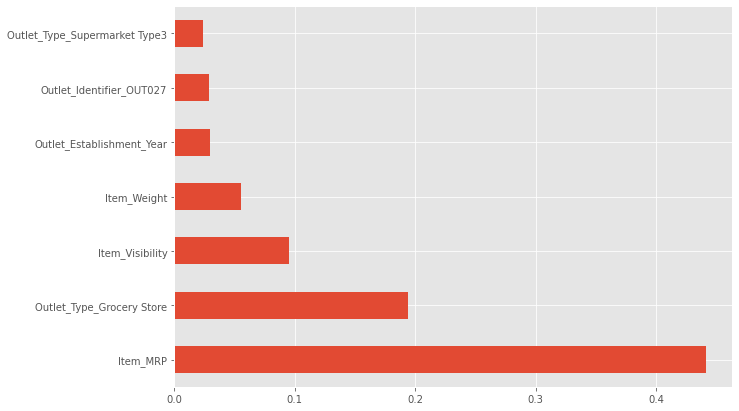

In [46]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(RF.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [49]:
feat_importances.nlargest(7).index.to_list()

['Item_MRP',
 'Outlet_Type_Grocery Store',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Outlet_Identifier_OUT027',
 'Outlet_Type_Supermarket Type3']

상위 7개 feature로 모델 재학습 하기

In [50]:
cols = feat_importances.nlargest(7).index.to_list()

In [51]:
X_train_if = X_train[cols]
X_test_if = X_test[cols]

RF_if = RandomForestRegressor()
RF_if.fit(X_train_if, y_train)

pred_train_if = RF_if.predict(X_train_if)
pred_test_if = RF_if.predict(X_test_if)

In [52]:
# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(y_train, pred_train_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(y_test, pred_test_if)**(0.5))

RMSE on train data:  427.42537966456473
RMSE on test data:  1163.3214397188972


- 컬럼수를 줄였더니 더 성능이 좋아졌다.

### ML pipeline 구축을 위해 피처 식별하기

ML 파이프라인 구축을 위해 가장 중요한 것은 구조를 저정의 하는 것이다.
여기서 머신러닝 파이프라인 구축을 위한 각 단계를 정리해 보았다.

#### 피처 선정 및 전처리

1. **Item_MRP:** It holds the price of the products. During the preprocessing step we used a standard scaler to scale this values.  

2. **Outlet_Type_Grocery_Store:** A binary column which indicates if the outlet type is a grocery store or not. To use this information in the model building process, we will add a binary feature in the existing data that contains 1 (if outlet type is a grocery store) and 0 ( if outlet type is something else).  

3. **Item_Visibility:** Denotes visibility of products in the store. Since this variable had a small value range and no missing values, we didn’t apply any preprocessing steps on this variable.  

4. **Outlet_Type_Supermarket_Type3:** Another binary column indicating if the outlet type is a “supermarket_type_3” or not. To capture this information we will create binary feature that stores 1 (if outlet type is supermarket_type_3) and 0 (othewise).  

5. **Outlet_Identifier_OUT027:** This feature specifies whether the outlet identifier is “OUT027” or not. Similar to the last previous example, we will create a separate column that carries 1 (if outlet type is grocery store) and 0 (otherwise).  

6. **Outlet_Establishment_Year:** The Outlet_Establishment_Year describes year of establishment of the stores. Since we did not perform any transformation on values in this column, we will not preprocess it in the pipeline as well.  

7. **Item_Weight:** During the preprocessing steps we observed that Item_Weight had missing values. These missing values were imputed using the average of the column. This has to be taken into account while building the machine learning pipeline.

위 7개의 컬럼 외에 나머지는 버린다.

#### Pipeline design

마지막 단계는 전처리 요구조건을 이해하기 위해 프로토타입을 구축하는 것이다.

파이프라인 디자인 과정은 다음과 같다.  
1. Create the required binary features  
2. Perform required data preprocessing and transformations  
3. Build a model to predict the sales  

**1. Create the required binary features**  
기존 데이터에서 커스텀 transformer를 사용해서 3개 컬럼에 대해 binary 컬럼을 추가한다.    
- Outlet_Type : Grocery Store  
- Outlet_Type : Supermarket Type3  
- Outlet_Identifier_OUT027  

**2. Data Preprocessing and transformations**  
We will use a ColumnTransformer to do the required transformations. It will contain 3 steps.  

- Drop the columns that are not required for model training  
- Impute missing values in the column Item_Weight using the average  
- Scale the column Item_MRP using  StandardScaler()  

#### Build Pipeline

첫번째 단계는 데이터셋을 읽어들여 변수와 타겟으로 구분하는 것이다.

In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [3]:
data = pd.read_csv('data/Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
X_train = data.drop(columns=['Item_Outlet_Sales'])
y_train = data['Item_Outlet_Sales']

다음 3개의 바이너리 컬럼을 생성한다. 이 과정을 정리하면 다음과 같다.  
- OutletTypeEncoder 클래스를 정의   
- 정의 과정에서 BaseEstimater의 파라미터를 추가  
- 정의 과정에서 fit, transform 메서드 추가

In [5]:
# import the BaseEstimator
from sklearn.base import BaseEstimator

In [14]:
class OutletTypeEncoder(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, documents, y = None):
        return self
    
    def transform(self, data):
        data['outlet_grocery_store'] = (data['Outlet_Type'] == 'Grocery Store')*1
        data['outlet_supermarket_3'] = (data['Outlet_Type'] == 'Supermarket Type3')*1
        data['outlet_identifier_OUT027'] = (data['Outlet_Identifier'] == 'OUT027')*1
        
        return data

전처리 과정 정의하기. 순서는 다음과 같다.  
- 불필요 컬럼  drop하기 : Item_Identifier, Outlet_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Establishment_Year  
- 결측치 처리 : Item_Weight, 평균 값으로  
- 정규화 : Item_MRP, StandardScaler

In [15]:
pre_process = ColumnTransformer(remainder='passthrough', 
              transformers=[('drop_columns', 'drop', 
                    ['Item_Identifier','Outlet_Identifier', 'Item_Fat_Content',
                    'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
                     'Outlet_Location_Type','Outlet_Type']),
        ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
        ('scale_data', StandardScaler(),['Item_MRP'])])

### Predict the target

다음의 3단계로 구성된다.  
- Step1: get the oultet binary columns
- Step2: pre processing
- Step3: Train a Random Forest Model

In [16]:
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                 ('pre_processing',pre_process),
                ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])

In [20]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()),
                ('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['Item_Identifier',
                                                   'Outlet_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('impute_item_weight',
                                                  SimpleImputer(),
                                                  ['Item_Weight'])

In [21]:
model_pipeline.predict(X_train)

array([4348.01437159,  693.40276088, 2323.35268531, ..., 1300.83665376,
       1508.86795688, 1152.35475793])

시험해보기

In [22]:
test = pd.read_csv('./data/Test.csv')

In [23]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [24]:
model_pipeline.predict(test)

array([1646.0548363 , 1305.4298012 ,  649.26184297, ..., 1848.60226305,
       3959.67937864, 1384.01466986])

### 한코드로 정리

In [27]:
# importing required libraries
import pandas as pd
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# read the training data set
data = pd.read_csv('./data/Train.csv')

# top rows of the data
data.head()

# seperate the independent and target variables
train_x = data.drop(columns=['Item_Outlet_Sales'])
train_y = data['Item_Outlet_Sales']


# import the BaseEstimator
from sklearn.base import BaseEstimator

# define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        
        return x_dataset

# pre-processsing step
# Drop the columns - 
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ('scale_data', StandardScaler(),['Item_MRP'])])

# Define the Pipeline
"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""
print('\n\nBuilding Pipeline\n\n')
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])
# fit the pipeline with the training data
print('Fitting the pipeline with the training data')
model_pipeline.fit(train_x,train_y)

# predict target values on the training data
print('\n\nPredict target on the train data\n\n')
print(model_pipeline.predict(train_x))

print('Reading the test data: ')
# read the test data
test_data = pd.read_csv('./data/Test.csv')

# predict target variables on the test data 
print('\n\nPredict on the test data\n\n')
print(model_pipeline.predict(test_data))



Building Pipeline


Fitting the pipeline with the training data


Predict target on the train data


[4348.01437159  693.40276088 2323.35268531 ... 1300.83665376 1508.86795688
 1152.35475793]
Reading the test data: 


Predict on the test data


[1646.0548363  1305.4298012   649.26184297 ... 1848.60226305 3959.67937864
 1384.01466986]
